# Notebook 4 - Working on the Education/Salary dataframe [🚧W.I.P.🚧]

In this notebook we aim to analyse the correlation between education and salary. We will use the dataframe created in the previous notebook.

Objectives:
- Expansion of the dataframe with other data relevant to our analysis.
- Creation of graphs
- Chronological analysis of the correlation with possibility of forecasting

In [1]:
#Libraries Needed
import pandas as pd
import numpy as np


In [18]:
# Import the csv file, gdp_and_census.csv, into a dataframe called gdp_and_census [refer to NB3 for the code to create this csv file]

gdp_and_census = pd.read_csv('../data/gdp_and_census.csv')
gdp_us_time = pd.read_csv('../data/gdp_us_over_time.csv') #contains the GDP of the US over time, adjusted for inflation
college_percentage= pd.read_excel('../data/college_percentage.xlsx') #contains the percentage of people with a college degree in the US over time
gdp_and_census.head()

,state,county,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,1,1,1001,0.0,18.273684,25.839051
1,1,3,1003,34.0,20.436842,27.172905
2,1,9,1009,3.0,18.923077,14.114381
3,1,15,1015,0.0,16.352941,33.422040
4,1,25,1025,0.0,17.007692,31.323492


In [19]:
gdp_us_time.head()

,Entity,Code,Year,GDP per capita (constant 2015 US$)
0,United States,USA,1960,19135.26758
1,United States,USA,1961,19253.54688
2,United States,USA,1962,20116.23438
3,United States,USA,1963,20701.26953
4,United States,USA,1964,21599.81836


In [4]:
college_percentage.head()

,Year,College Percentage
0,2022,37.7
1,2021,37.9
2,2020,37.5
3,2019,36.0
4,2018,35.0


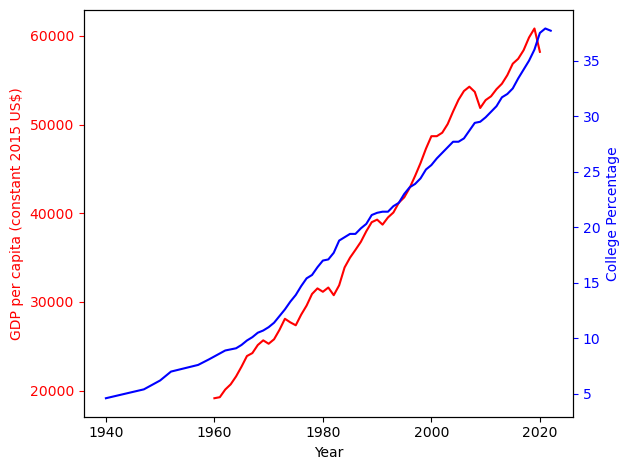

In [5]:
#plot the GDP of the US over time and college percentage over time, using different y-axes
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(gdp_us_time['Year'], gdp_us_time['GDP per capita (constant 2015 US$)'], color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita (constant 2015 US$)', color='red')
ax1.tick_params('y', colors='red')
ax2 = ax1.twinx()
ax2.plot(college_percentage['Year'], college_percentage['College Percentage'], color='blue')
ax2.set_ylabel('College Percentage', color='blue')
ax2.tick_params('y', colors='blue')
fig.tight_layout()
plt.show()




A correlation is evident. But is it strictly related? Is economic increase just a common trend over time? How can we be sure that the economic increase is strictly due to the percentage of college education?
Analysing at a county level, the correlation is more relevant. Richer counties are more educated. However, we cannot escape from a vicious circle that does not allow to understand what comes first education or income: richer counties and can afford to pay further studies to their children or individuals that have studied more earn more. 

In [11]:
# Merge into a single dataframe called education_and_gdp_over_time
education_and_gdp_over_time = pd.merge(gdp_us_time, college_percentage, on='Year')
education_and_gdp_over_time.head()

,Entity,Code,Year,GDP per capita (constant 2015 US$),College Percentage
0,United States,USA,1962,20116.23438,8.9
1,United States,USA,1964,21599.81836,9.1
2,United States,USA,1965,22696.67773,9.4
3,United States,USA,1966,23894.40820,9.8
4,United States,USA,1967,24226.52930,10.1


In [20]:
# In the GDP data keep only year and GDP per capita (constant 2015 US$) and rename these as DS and Y respectively
gdp_us_time = gdp_us_time[['Year', 'GDP per capita (constant 2015 US$)']]
gdp_us_time.columns = ['ds', 'y']
#Transform the DS column into datetime format
gdp_us_time['ds'] = pd.to_datetime(gdp_us_time['ds'], format='%Y')

gdp_us_time.head()

,ds,y
0,1960-01-01,19135.26758
1,1961-01-01,19253.54688
2,1962-01-01,20116.23438
3,1963-01-01,20701.26953
4,1964-01-01,21599.81836


In [26]:
# Do the same thing for the education data
college_percentage = college_percentage[['Year', 'College Percentage']]
college_percentage.columns = ['ds', 'y']
college_percentage['ds'] = pd.to_datetime(college_percentage['ds'], format='%Y')
college_percentage.head()

,ds,y
0,2022-01-01,37.7
1,2021-01-01,37.9
2,2020-01-01,37.5
3,2019-01-01,36.0
4,2018-01-01,35.0


In [28]:
# Forecast the next 10 years of GDP per capita and college percentage with "prophet"
from prophet import Prophet
m = Prophet()
m.fit(gdp_us_time)
future = m.make_future_dataframe(periods=10, freq='Y')
gdp_forecast = m.predict(future)
gdp_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



09:58:38 - cmdstanpy - INFO - Chain [1] start processing
09:58:39 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
66,2025-12-31,62850.888117,61556.487104,64075.980869
67,2026-12-31,63292.679254,62068.234995,64469.723022
68,2027-12-31,63710.001824,62478.321425,65010.015328
69,2028-12-31,64623.439617,63351.085332,65825.943728
70,2029-12-31,65089.875724,63808.975026,66457.094249


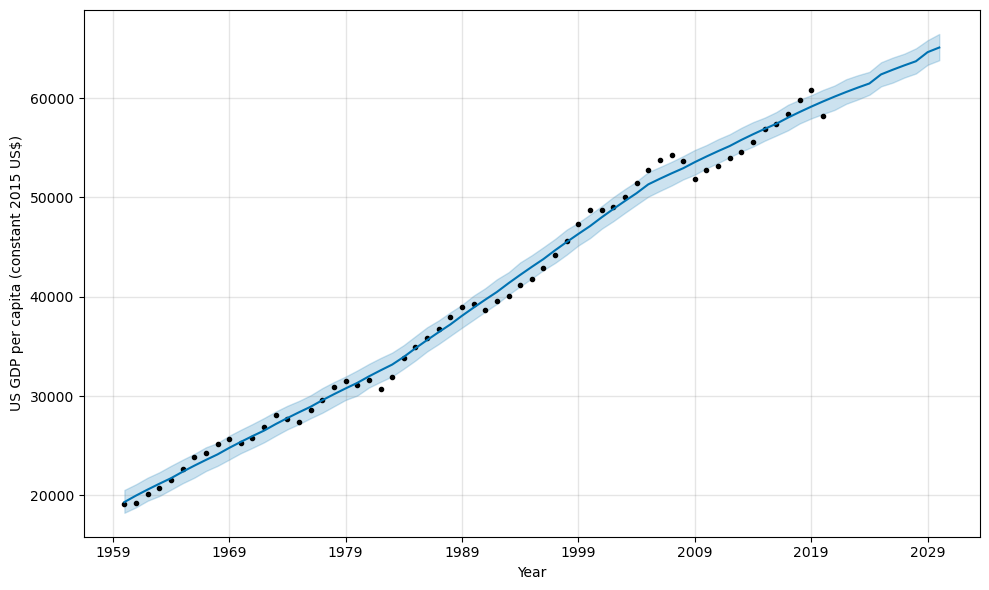

In [29]:
#plot the forecast with the labels year and GDP per capita (constant 2015 US$)
fig1 = m.plot(gdp_forecast)
ax = fig1.gca()
ax.set_xlabel('Year')
ax.set_ylabel('US GDP per capita (constant 2015 US$)')
plt.show()

09:58:46 - cmdstanpy - INFO - Chain [1] start processing
09:58:47 - cmdstanpy - INFO - Chain [1] done processing


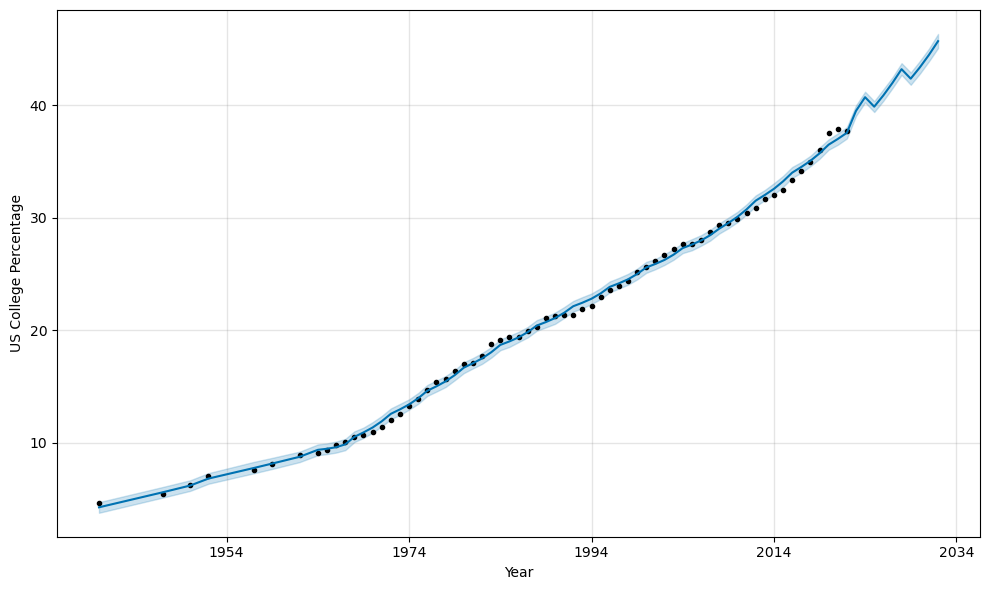

In [30]:
# Forecast the education data with prophet. Plot the forecast with the labels year and college percentage
m = Prophet()
m.fit(college_percentage)
future = m.make_future_dataframe(periods=10, freq='Y')
ed_forecast = m.predict(future)
ed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(ed_forecast)
ax = fig1.gca()
ax.set_xlabel('Year')
ax.set_ylabel('US College Percentage')
plt.show()

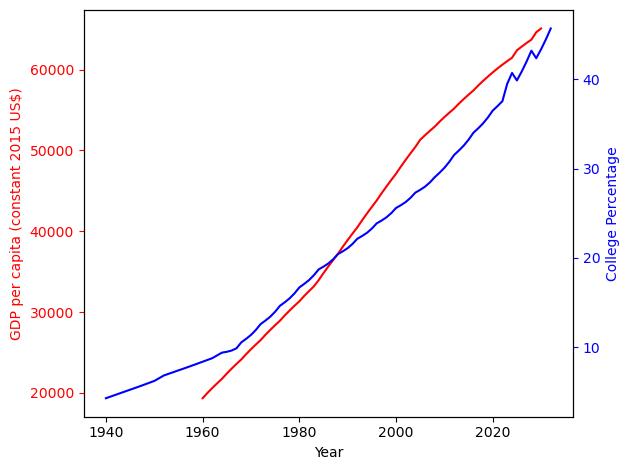

In [32]:
#plot the two forecasts together
fig, ax1 = plt.subplots()
ax1.plot(gdp_forecast['ds'], gdp_forecast['yhat'], color='red') 
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita (constant 2015 US$)', color='red')
ax1.tick_params('y', colors='red')
ax2 = ax1.twinx()
ax2.plot(ed_forecast['ds'], ed_forecast['yhat'], color='blue')
ax2.set_ylabel('College Percentage', color='blue')
ax2.tick_params('y', colors='blue')
fig.tight_layout()
plt.show()